In [2]:
import pandas as pd

In [3]:
# reading the training data
df = pd.read_csv('train.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
import numpy as np
import piplite 
await piplite.install('seaborn')
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df.shape

(1460, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Get non-null count percentage
missing_data = df.isnull().sum()*100/df.shape[0]
missing_data

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [10]:
#See unique values of FireplaceQu 
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [11]:
df[df.FireplaceQu.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,832,832,GasA,Ex,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,

In [12]:
# Replacing missing values with 'NA' for FireplaceQu i.e. No Fireplace as 'Fireplaces' values are 0 for it.
df['FireplaceQu'] =df['FireplaceQu'].fillna('NA')

In [13]:
# Need to drop col which are more than 50% missing 
dropped_missing = df.dropna(thresh=df.shape[0]*0.4,axis=1)
dropped_missing.shape

(1460, 77)

In [14]:
# Get non-null count percentage
missing_data = dropped_missing.isnull().sum()*100/dropped_missing.shape[0]
missing_data

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 77, dtype: float64

In [38]:
# Check if we can drop rows and how many rows
dropped_missing[dropped_missing[['MasVnrType','MasVnrArea','GarageType','BsmtCond','BsmtQual']].isna().any(axis=1)].shape

(119, 75)

In [15]:
#See values of LotFrontage
dropped_missing.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [16]:
#See median of LotFrontage
LotFrontage_median = dropped_missing.LotFrontage.median()
LotFrontage_median

69.0

In [17]:
dropped_missing.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:>

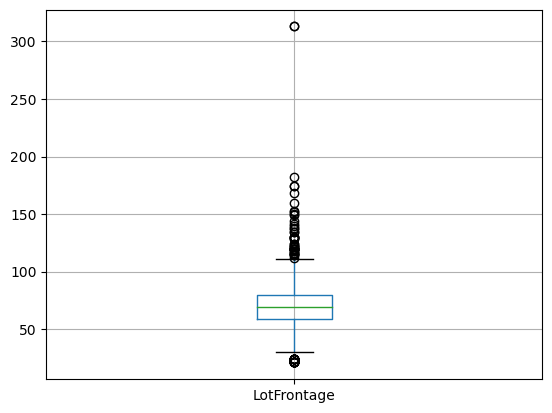

In [18]:
dropped_missing.boxplot(column='LotFrontage',return_type='axes')

In [19]:
#fill missing values of LotFrontage with median due to some outliers in data shown from Descibe section
dropped_missing.LotFrontage = dropped_missing.LotFrontage.fillna(LotFrontage_median)

<ipython-input-19-ce62ee8a1896>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_missing.LotFrontage = dropped_missing.LotFrontage.fillna(LotFrontage_median)


In [20]:
dropped_missing.MasVnrArea = dropped_missing.MasVnrArea.fillna(dropped_missing.MasVnrArea.median())

<ipython-input-20-ef8ae7ff8fc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_missing.MasVnrArea = dropped_missing.MasVnrArea.fillna(dropped_missing.MasVnrArea.median())


In [21]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
dropped_missing.MasVnrType = dropped_missing.MasVnrType.fillna('None')
#replace Nan values of BsmtQual with NA i.e. No Basement
dropped_missing.BsmtQual = dropped_missing.BsmtQual.fillna('NA')
#replace Nan values of BsmtCond with NA i.e. No Basement
dropped_missing.BsmtCond = dropped_missing.BsmtCond.fillna('NA')
#replace Nan values of BsmtExposure with No i.e. No Exposure
dropped_missing.BsmtExposure = dropped_missing.BsmtExposure.fillna('No')
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
dropped_missing.BsmtFinType1 = dropped_missing.BsmtFinType1.fillna('NA')
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
dropped_missing.BsmtFinType2 = dropped_missing.BsmtFinType2.fillna('NA')
#impute missing values of Electrical with mode due to categorical column
dropped_missing.Electrical = dropped_missing.Electrical.fillna(dropped_missing.Electrical.mode()[0])    
#replace Nan values of GarageType with NA i.e. No Garage
dropped_missing.GarageType = dropped_missing.GarageType.fillna('NA')
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
dropped_missing.GarageYrBlt = dropped_missing.GarageYrBlt.fillna(0)
#replace Nan values of GarageFinish with NA i.e. No Garage
dropped_missing.GarageFinish = dropped_missing.GarageFinish.fillna('NA')
#replace Nan values of GarageQual with NA i.e. No Garage
dropped_missing.GarageQual = dropped_missing.GarageQual.fillna('NA')
#replace Nan values of GarageFinish with NA i.e. No Garage
dropped_missing.GarageQual = dropped_missing.GarageQual.fillna('NA')
#replace Nan values of GarageCond with NA i.e. No Garage
dropped_missing.GarageCond = dropped_missing.GarageCond.fillna('NA')

<ipython-input-21-3d24c116dfe6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_missing.MasVnrType = dropped_missing.MasVnrType.fillna('None')
<ipython-input-21-3d24c116dfe6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_missing.BsmtQual = dropped_missing.BsmtQual.fillna('NA')
<ipython-input-21-3d24c116dfe6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [22]:
#check missing values
dropped_missing.isnull().sum()[dropped_missing.isnull().sum()>0]

Series([], dtype: int64)

In [23]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
dropped_missing['HouseAge'] = dropped_missing.YrSold - dropped_missing.YearBuilt
#Drop YrSold, YearBuilt after HouseAge
dropped_missing=dropped_missing.drop(columns=['YrSold', 'YearBuilt'])

<ipython-input-23-ccde7284916e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_missing['HouseAge'] = dropped_missing.YrSold - dropped_missing.YearBuilt


In [24]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
dropped_missing = dropped_missing.astype(convert_dict)

In [99]:
# #convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
# dropped_missing = dropped_missing.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
# #convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
# dropped_missing = dropped_missing.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
# #convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
# dropped_missing = dropped_missing.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})
# #convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
# dropped_missing = dropped_missing.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})
# #convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
# dropped_missing = dropped_missing.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
# #convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
# dropped_missing = dropped_missing.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})
# #convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
# dropped_missing = dropped_missing.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [25]:
dropped_missing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,HouseAge
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000,8


In [81]:
for c in dropped_missing.columns:
    if dropped_missing[c].dtype == object :
        print(c)
        print(dropped_missing[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [82]:
#Drop columns which have moe than 80% bias data
dropped_missing=dropped_missing.drop(columns=['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [26]:
# Creating Dummy Varibales

In [83]:
# create dummy variables from category and remove the first and the parent variable
X = pd.get_dummies(data=dropped_missing, drop_first=True)
X.head()

<ipython-input-83-3314ef375b31>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(data=dropped_missing, drop_first=True)


,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,1,65.0,8450,7,5,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,2,80.0,9600,6,8,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,3,68.0,11250,7,5,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,4,60.0,9550,7,5,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [84]:
X = X.drop('Id',axis=1)

In [85]:
X.shape

(1460, 170)

In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
X_train,X_test = train_test_split(X,train_size=0.70,random_state=100)
print(X_train.shape)
print(X_test.shape)

(1021, 170)
(439, 170)


In [87]:
# scaling using min max algorithm, fitting to training set.
from sklearn import preprocessing
min_max_scaler_train = preprocessing.MinMaxScaler()
train_scaled = min_max_scaler_train.fit_transform(X_train)
train_scaled_df = pd.DataFrame(train_scaled, columns = X_train.columns)

In [88]:
train_scaled_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,0.236301,0.039403,0.666667,0.500,0.716667,0.16,0.174876,0.000000,0.154110,0.220458,0.231481,0.616949,0.0,0.424289,0.333333,0.0,0.666667,0.5,0.500,0.0,0.545455,0.333333,0.991542,0.75,0.462623,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.0,0.272727,0.312595,0.117647,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.106164,0.033981,0.555556,0.375,0.000000,0.00,0.016655,0.000000,0.274401,0.120295,0.098611,0.333656,0.0,0.201576,0.000000,0.0,0.333333,0.5,0.375,0.0,0.363636,0.333333,0.969652,0.25,0.155148,0.000000,0.267686,0.000000,0.0,0.0,0.0,0.0,0.272727,0.108457,0.477941,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0

In [89]:
#create X_train,y_train 
y_train = train_scaled_df.pop('SalePrice')
X_train_1 = train_scaled_df

In [90]:
X_train_1.shape

(1021, 169)

In [91]:
lm = LinearRegression()
lm.fit(X_train_1, y_train)

# Selecting 30 variables at start
rfe = RFE(lm, n_features_to_select = 30)
rfe = rfe.fit(X_train_1, y_train)

In [92]:
list(zip(X_train_1.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearRemodAdd', False, 35),
 ('MasVnrArea', False, 5),
 ('BsmtFinSF1', False, 13),
 ('BsmtFinSF2', False, 18),
 ('BsmtUnfSF', False, 14),
 ('TotalBsmtSF', False, 15),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 19),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 83),
 ('FullBath', False, 7),
 ('HalfBath', False, 88),
 ('BedroomAbvGr', False, 3),
 ('KitchenAbvGr', False, 90),
 ('TotRmsAbvGrd', False, 89),
 ('Fireplaces', False, 45),
 ('GarageYrBlt', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 78),
 ('WoodDeckSF', False, 67),
 ('OpenPorchSF', False, 10),
 ('EnclosedPorch', False, 57),
 ('3SsnPorch', False, 46),
 ('ScreenPorch', False, 30),
 ('PoolArea', False, 50),
 ('MiscVal', False, 123),
 ('MoSold', False, 134),
 ('HouseAge', True, 1),
 ('MSSubClass_30', False, 116),
 ('MSSubClass_40', False, 97),
 ('MSSubC

In [93]:
# Selecting the rfe supported variables
col = X_train_1.columns[rfe.support_]
print(col)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'GarageYrBlt', 'GarageCars',
       'HouseAge', 'MSSubClass_160', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Exterior1st_AsphShn', 'Exterior1st_ImStucc', 'Exterior2nd_ImStucc',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NA', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'BsmtFinType1_NA', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_NA', 'GarageFinish_NA'],
      dtype='object')


In [94]:
X_train_1.columns[~rfe.support_]

Index(['YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'LowQualFinSF', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'FireplaceQu_NA', 'FireplaceQu_Po', 'FireplaceQu_TA',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=139)

In [95]:
X_train_rfe = X_train_1[col]

In [41]:
# Function to list out the VIF score of each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [96]:
# Checking for VIF for coliniearity amng variables
calculateVIF(X_train_rfe)

,Features,VIF
29,GarageFinish_NA,inf
21,BsmtQual_NA,inf
28,GarageType_NA,inf
24,BsmtFinType1_NA,inf
6,GrLivArea,674.88
4,1stFlrSF,382.26
5,2ndFlrSF,146.55
8,GarageYrBlt,140.20
2,OverallQual,49.33
3,OverallCond,24.88


In [97]:
X_train_lr_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     199.9
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        08:55:06   Log-Likelihood:                 1773.4
No. Observations:                1021   AIC:                            -3489.
Df Residuals:                     992   BIC:                            -3346.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3004 

In [98]:
#dropping high VIF and high P
# As GrLivArea shows high VIF values and high p values hence we can drop it
X_train_new = X_train_rfe.drop(['GrLivArea'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
28,GarageFinish_NA,inf
20,BsmtQual_NA,inf
27,GarageType_NA,inf
23,BsmtFinType1_NA,inf
7,GarageYrBlt,138.59
2,OverallQual,49.31
3,OverallCond,24.75
8,GarageCars,19.01
26,KitchenQual_TA,16.41
21,BsmtQual_TA,14.17


In [99]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     207.5
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        08:59:50   Log-Likelihood:                 1773.4
No. Observations:                1021   AIC:                            -3491.
Df Residuals:                     993   BIC:                            -3353.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2910 

In [100]:
#dropping high VIF and high P
# As Exterior1st_AsphShn shows high VIF values and high p values hence we can drop it
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
27,GarageFinish_NA,inf
19,BsmtQual_NA,inf
26,GarageType_NA,inf
22,BsmtFinType1_NA,inf
7,GarageYrBlt,138.38
2,OverallQual,49.25
3,OverallCond,24.75
8,GarageCars,18.99
25,KitchenQual_TA,16.40
20,BsmtQual_TA,14.17


In [101]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     215.5
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:00:23   Log-Likelihood:                 1773.0
No. Observations:                1021   AIC:                            -3492.
Df Residuals:                     994   BIC:                            -3359.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2891 

In [102]:
#dropping high VIF and high P
# As GarageType_NA shows high VIF values and high p values hence we can drop it
X_train_new = X_train_new.drop(['GarageType_NA'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
22,BsmtFinType1_NA,inf
19,BsmtQual_NA,inf
7,GarageYrBlt,138.38
2,OverallQual,49.25
3,OverallCond,24.75
8,GarageCars,18.99
25,KitchenQual_TA,16.40
20,BsmtQual_TA,14.17
4,1stFlrSF,11.44
24,KitchenQual_Gd,10.67


In [103]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     215.5
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:01:01   Log-Likelihood:                 1773.0
No. Observations:                1021   AIC:                            -3492.
Df Residuals:                     994   BIC:                            -3359.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2891 

In [104]:
#dropping high VIF and high P
# As GarageFinish_NA  shows high VIF values and high p values hence we can drop it
X_train_new = X_train_new.drop(['GarageFinish_NA'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
19,BsmtQual_NA,inf
22,BsmtFinType1_NA,inf
2,OverallQual,34.27
7,GarageYrBlt,31.24
3,OverallCond,22.67
8,GarageCars,18.89
20,BsmtQual_TA,12.71
25,KitchenQual_TA,11.69
4,1stFlrSF,11.35
0,LotFrontage,8.80


In [105]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     224.0
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:01:41   Log-Likelihood:                 1772.4
No. Observations:                1021   AIC:                            -3493.
Df Residuals:                     995   BIC:                            -3365.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0731 

In [106]:
#dropping high P
# As Exterior1st_ImStucc shows high VIF values and high p values hence we can drop it
X_train_new = X_train_new.drop(['Exterior1st_ImStucc'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
18,BsmtQual_NA,inf
21,BsmtFinType1_NA,inf
2,OverallQual,34.25
7,GarageYrBlt,31.17
3,OverallCond,22.67
8,GarageCars,18.83
19,BsmtQual_TA,12.71
24,KitchenQual_TA,11.69
4,1stFlrSF,11.33
0,LotFrontage,8.80


In [107]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     232.9
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:02:16   Log-Likelihood:                 1771.0
No. Observations:                1021   AIC:                            -3492.
Df Residuals:                     996   BIC:                            -3369.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0739 

In [108]:
#dropping high P
# As Exterior2nd_ImStucc shows high VIF values and high p values hence we can drop it
X_train_new = X_train_new.drop(['Exterior2nd_ImStucc'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
17,BsmtQual_NA,inf
20,BsmtFinType1_NA,inf
2,OverallQual,34.24
7,GarageYrBlt,31.12
3,OverallCond,22.64
8,GarageCars,18.81
18,BsmtQual_TA,12.70
23,KitchenQual_TA,11.69
4,1stFlrSF,11.33
0,LotFrontage,8.79


In [109]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     242.5
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:02:47   Log-Likelihood:                 1769.7
No. Observations:                1021   AIC:                            -3491.
Df Residuals:                     997   BIC:                            -3373.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0743 

In [110]:
#dropping high P
# As GarageYrBlt shows high VIF values and high p values hence we can drop it
X_train_new = X_train_new.drop(['GarageYrBlt'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
16,BsmtQual_NA,inf
19,BsmtFinType1_NA,inf
2,OverallQual,33.15
3,OverallCond,21.76
17,BsmtQual_TA,12.34
7,GarageCars,11.86
4,1stFlrSF,11.29
22,KitchenQual_TA,11.23
0,LotFrontage,8.78
21,KitchenQual_Gd,8.47


In [111]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     252.8
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:03:16   Log-Likelihood:                 1768.0
No. Observations:                1021   AIC:                            -3490.
Df Residuals:                     998   BIC:                            -3377.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0692 

In [112]:
#dropping high P
# As LotFrontage shows high VIF values and high p values hence we can drop it
X_train_new = X_train_new.drop(['LotFrontage'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
18,BsmtFinType1_NA,inf
15,BsmtQual_NA,inf
1,OverallQual,33.01
2,OverallCond,21.70
16,BsmtQual_TA,12.15
6,GarageCars,11.76
21,KitchenQual_TA,11.15
3,1stFlrSF,10.28
20,KitchenQual_Gd,8.45
14,BsmtQual_Gd,7.98


In [113]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     263.8
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:03:42   Log-Likelihood:                 1765.9
No. Observations:                1021   AIC:                            -3488.
Df Residuals:                     999   BIC:                            -3379.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0628 

In [114]:
#dropping high VIF
# As BsmtFinType1_NA  shows high VIF values and high p values hence we can drop it
X_train_new = X_train_new.drop(['BsmtFinType1_NA'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
1,OverallQual,33.01
2,OverallCond,21.70
16,BsmtQual_TA,12.15
6,GarageCars,11.76
20,KitchenQual_TA,11.15
3,1stFlrSF,10.28
19,KitchenQual_Gd,8.45
14,BsmtQual_Gd,7.98
7,HouseAge,7.76
4,2ndFlrSF,2.64


In [115]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     263.8
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:04:20   Log-Likelihood:                 1765.9
No. Observations:                1021   AIC:                            -3488.
Df Residuals:                     999   BIC:                            -3379.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0628 

In [116]:
#dropping high VIF
# As OverallQual  shows high VIF values and high p values hence we can drop it
X_train_new = X_train_new.drop(['OverallQual'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
1,OverallCond,17.61
15,BsmtQual_TA,12.14
19,KitchenQual_TA,10.94
5,GarageCars,10.68
18,KitchenQual_Gd,8.24
13,BsmtQual_Gd,7.87
2,1stFlrSF,7.84
6,HouseAge,7.58
3,2ndFlrSF,2.23
0,LotArea,2.16


In [117]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     252.2
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:04:55   Log-Likelihood:                 1725.2
No. Observations:                1021   AIC:                            -3408.
Df Residuals:                    1000   BIC:                            -3305.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1429 

In [118]:
X_train_new_1 = X_train_new
X_train_new_1['OverallQual'] = X_train_rfe['OverallQual'].values

In [130]:
X_train_lr_1 = sm.add_constant(X_train_new_1)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     263.8
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:16:32   Log-Likelihood:                 1765.9
No. Observations:                1021   AIC:                            -3488.
Df Residuals:                     999   BIC:                            -3379.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0628 

In [120]:
calculateVIF(X_train_new_1)

,Features,VIF
20,OverallQual,33.01
1,OverallCond,21.70
15,BsmtQual_TA,12.15
5,GarageCars,11.76
19,KitchenQual_TA,11.15
2,1stFlrSF,10.28
18,KitchenQual_Gd,8.45
13,BsmtQual_Gd,7.98
6,HouseAge,7.76
3,2ndFlrSF,2.64


In [121]:
X_train_new = X_train_new_1

In [122]:
#dropping high VIF
# As OverallCond  shows high VIF values and high p values hence we can drop it
X_train_new = X_train_new.drop(['OverallCond'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
19,OverallQual,26.78
4,GarageCars,11.73
14,BsmtQual_TA,11.55
18,KitchenQual_TA,10.99
1,1stFlrSF,10.24
17,KitchenQual_Gd,8.25
12,BsmtQual_Gd,7.73
5,HouseAge,6.84
2,2ndFlrSF,2.63
0,LotArea,2.17


In [123]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     262.2
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:13:41   Log-Likelihood:                 1741.9
No. Observations:                1021   AIC:                            -3442.
Df Residuals:                    1000   BIC:                            -3338.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0972 

In [124]:
#dropping high VIF
# As GarageCars shows high VIF values and high p values hence we can drop it
X_train_new = X_train_new.drop(['GarageCars'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
18,OverallQual,23.34
13,BsmtQual_TA,11.53
17,KitchenQual_TA,10.81
1,1stFlrSF,9.70
16,KitchenQual_Gd,8.09
11,BsmtQual_Gd,7.72
4,HouseAge,6.66
2,2ndFlrSF,2.58
0,LotArea,2.16
3,BsmtFullBath,1.99


In [125]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     268.0
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:14:11   Log-Likelihood:                 1728.8
No. Observations:                1021   AIC:                            -3418.
Df Residuals:                    1001   BIC:                            -3319.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1134 

In [126]:
#dropping high VIF
# As GarageFinish_NA shows high VIF values and high p values hence we can drop it
X_train_new = X_train_new.drop(['OverallQual'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
13,BsmtQual_TA,11.22
17,KitchenQual_TA,9.98
11,BsmtQual_Gd,7.24
16,KitchenQual_Gd,7.20
4,HouseAge,6.63
1,1stFlrSF,5.57
0,LotArea,2.16
3,BsmtFullBath,1.98
2,2ndFlrSF,1.93
10,BsmtQual_Fa,1.79


In [127]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     249.0
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:15:07   Log-Likelihood:                 1674.5
No. Observations:                1021   AIC:                            -3311.
Df Residuals:                    1002   BIC:                            -3217.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2246 

In [128]:
#dropping high VIF
# As BsmtQual_TA shows high VIF values and high p values hence we can drop it
X_train_new = X_train_new.drop(['BsmtQual_TA'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
16,KitchenQual_TA,5.73
1,1stFlrSF,5.42
4,HouseAge,5.13
15,KitchenQual_Gd,4.61
11,BsmtQual_Gd,2.89
0,LotArea,2.15
3,BsmtFullBath,1.98
2,2ndFlrSF,1.93
14,KitchenQual_Fa,1.37
13,BsmtExposure_Gd,1.35


In [129]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     246.8
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:15:32   Log-Likelihood:                 1646.8
No. Observations:                1021   AIC:                            -3258.
Df Residuals:                    1003   BIC:                            -3169.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1913 

In [131]:
# Since the R squared decreased to a lot lower level from 0.845, hence stopping the removal of cloumns process
X_train_new = X_train_new_1

In [132]:
X_train_lr_1 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     263.8
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:19:19   Log-Likelihood:                 1765.9
No. Observations:                1021   AIC:                            -3488.
Df Residuals:                     999   BIC:                            -3379.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0628 

In [133]:
X_train_new.shape

(1021, 21)

In [137]:
X_train_lr_1.shape

(1021, 22)

In [134]:
# 21 columns in Final model after RFE and manual Elimination
# VIF is <= 5
# All columns have p-value <= 0.05

In [138]:
y_train_pred = lr_1.predict(X_train_lr_1)

In [141]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<ipython-input-142-a714e609a858>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

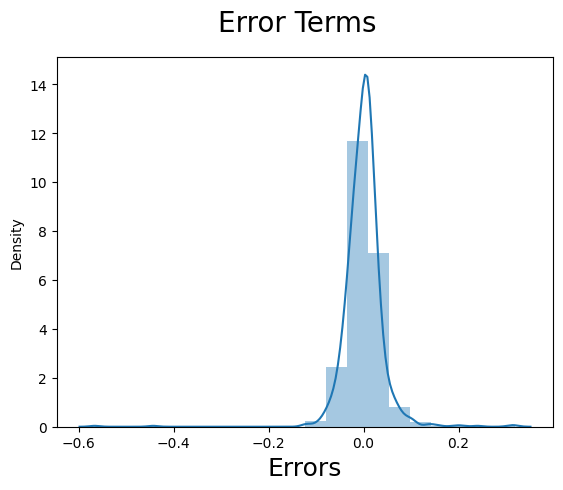

In [142]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [143]:
r2 = r2_score(y_true = y_train,y_pred = y_train_pred)
round(r2,2)

0.85

In [145]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_pred))
print(rss)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)
rmse = mse**0.5
print(rmse)

1.880566743734791
0.0018418871143337815
0.042917212331811366


In [146]:
# Residual analysis
y_res = (y_train - y_train_pred)

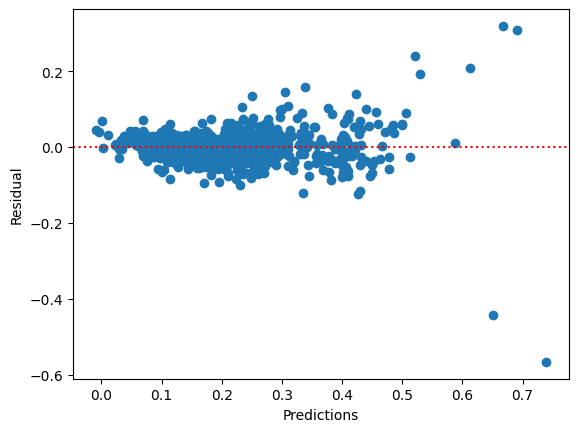

In [147]:
plt.scatter( y_train_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

In [149]:
# Scale Test set
test_scaled = min_max_scaler_train.transform(X_test)
test_scaled_df = pd.DataFrame(test_scaled, columns = X_test.columns)
test_scaled_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,0.133562,0.035192,0.333333,0.625,0.350000,0.00000,0.109142,0.0,0.106164,0.141408,0.113889,0.000000,0.0,0.081860,0.000000,0.0,0.333333,0.0,0.375,0.0,0.181818,0.000000,0.982090,0.50,0.372355,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.363636,0.118872,0.264706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.232877,0.047566,0.666667,0.500,0.900000,0.00000,0.000000,0.0,0.368151,0.140753,0.112963,0.416465,0.0,0.246349,0.000000,0.0,0.666667,0.5,0.375,0.0,0.363636,0.000000,0.997015,0.50,0.398449,0.000000,0.133843,0.0,0.0,0.0,0.000000,0.0,0.636364,0.224413,0.014706,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0

In [150]:
test_scaled_df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.00000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.0,439.0,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000

In [151]:
y_test = test_scaled_df.pop('SalePrice')
X_test_1 = test_scaled_df

In [152]:
col1 = X_train_lr_1.columns
col1

Index(['const', 'LotArea', 'OverallCond', '1stFlrSF', '2ndFlrSF',
       'BsmtFullBath', 'GarageCars', 'HouseAge', 'MSSubClass_160',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NA',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'OverallQual'],
      dtype='object')

In [153]:
X_test_1 = X_test_1[col1[1:]]
# Adding constant variable to test set
X_test_lr_1 = sm.add_constant(X_test_1)

In [154]:
y_pred = lr_1.predict(X_test_lr_1)

In [155]:
# Get the R2 of test set.
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8489

In [156]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

0.8233202333953609
0.0018754447229962661
0.04330640510359023


Text(0, 0.5, 'y_pred')

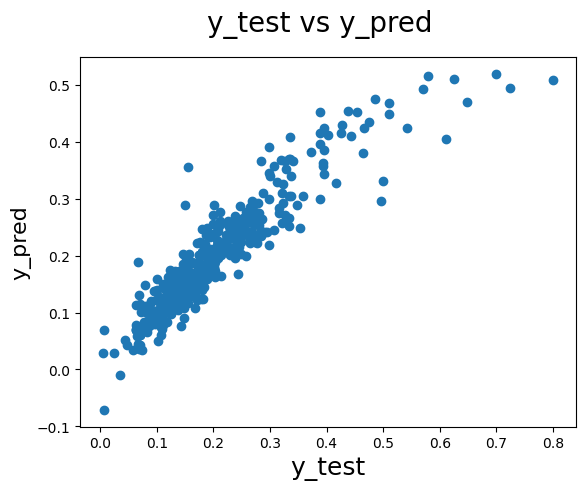

In [157]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [160]:
# Columns chosen
chosen_col = col1[1:]
chosen_col

Index(['LotArea', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'GarageCars', 'HouseAge', 'MSSubClass_160', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NA', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'OverallQual'],
      dtype='object')

In [161]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_pred))
print(rss)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)
rmse = mse**0.5
print(rmse)

1.880566743734791
0.0018418871143337815
0.042917212331811366


In [162]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

0.8233202333953609
0.0018754447229962661
0.04330640510359023


In [163]:
# Ridge Regression

In [164]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_lr_1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [165]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [166]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_lr_1, y_train)
print(ridge.coef_)

[ 0.          0.1471217   0.07866289  0.30633665  0.12744143  0.03469171
  0.05330472 -0.07890351 -0.04474032  0.09060309  0.0437623   0.03558495
  0.04374102 -0.05092372 -0.04825383 -0.06558183 -0.04676391  0.03240171
 -0.05243045 -0.04329573 -0.0533678   0.14739962]


In [170]:
lr_1.params

const                   0.062790
LotArea                 0.147127
OverallCond             0.078664
1stFlrSF                0.306342
2ndFlrSF                0.127442
BsmtFullBath            0.034691
GarageCars              0.053304
HouseAge               -0.078904
MSSubClass_160         -0.044740
Neighborhood_NoRidge    0.090603
Neighborhood_NridgHt    0.043762
Neighborhood_Somerst    0.035585
Neighborhood_StoneBr    0.043742
BsmtQual_Fa            -0.050924
BsmtQual_Gd            -0.048254
BsmtQual_NA            -0.065582
BsmtQual_TA            -0.046764
BsmtExposure_Gd         0.032401
KitchenQual_Fa         -0.052430
KitchenQual_Gd         -0.043296
KitchenQual_TA         -0.053367
OverallQual             0.147399
dtype: float64

In [171]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_ridge = ridge.predict(X_train_lr_1)
y_pred_test_ridge = ridge.predict(X_test_lr_1)

In [173]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_pred_train_ridge))
print(rss)
mse = mean_squared_error(y_train, y_pred_train_ridge)
print(mse)
rmse = mse**0.5
print(rmse)

1.8805667439817206
0.0018418871145756324
0.04291721233462901


In [175]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred_test_ridge))
print(rss)
mse = mean_squared_error(y_test, y_pred_test_ridge)
print(mse)
rmse = mse**0.5
print(rmse)

0.8233238183108833
0.0018754528890908503
0.04330649938624514


In [176]:
# Lasso

In [177]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lr_1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [178]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [179]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lr_1, y_train) 

Lasso(alpha=0.0001)

In [180]:
lasso.coef_

array([ 0.        ,  0.1034774 ,  0.06842049,  0.29966516,  0.1237272 ,
        0.03531962,  0.05529417, -0.07596523, -0.04305506,  0.08741042,
        0.04236665,  0.03157711,  0.0332508 , -0.04179238, -0.04365787,
       -0.05670952, -0.04139726,  0.03395925, -0.04725291, -0.04036501,
       -0.05123153,  0.15910662])

In [181]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_lasso = lasso.predict(X_train_lr_1)
y_pred_test_lasso = lasso.predict(X_test_lr_1)

In [183]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_pred_train_lasso))
print(rss)
mse = mean_squared_error(y_train, y_pred_train_lasso)
print(mse)
rmse = mse**0.5
print(rmse)

1.8918288129156229
0.0018529175444815112
0.04304552873971362


In [184]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred_test_lasso))
print(rss)
mse = mean_squared_error(y_test, y_pred_test_lasso)
print(mse)
rmse = mse**0.5
print(rmse)

0.8489956060064017
0.0019339307653904365
0.04397647968392236


In [185]:
betas = pd.DataFrame(index=X_train_lr_1.columns)

In [186]:
betas.rows = X_train_lr_1.columns

<ipython-input-186-f6cc9e7b1cec>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train_lr_1.columns


In [187]:
betas['Linear'] = lr_1.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [189]:
pd.set_option('display.max_rows', None)
betas.head(100)

,Linear,Ridge,Lasso
const,0.062790,0.000000,0.000000
LotArea,0.147127,0.147122,0.103477
OverallCond,0.078664,0.078663,0.068420
1stFlrSF,0.306342,0.306337,0.299665
2ndFlrSF,0.127442,0.127441,0.123727
BsmtFullBath,0.034691,0.034692,0.035320
GarageCars,0.053304,0.053305,0.055294
HouseAge,-0.078904,-0.078904,-0.075965
MSSubClass_160,-0.044740,-0.044740,-0.043055
Neighborhood_NoRidge,0.090603,0.090603,0.087410


In [190]:
#earlier for Ridge alpha = 10 now take 20
alpha = 0.0002
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_lr_1, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_lr_1)
y_pred_test = ridge.predict(X_test_lr_1)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 0.          0.14711665  0.0786619   0.30633118  0.12744047  0.03469198
  0.05330561 -0.07890292 -0.04474066  0.09060322  0.04376219  0.03558471
  0.04374051 -0.0509236  -0.04825373 -0.0655814  -0.0467638   0.0324021
 -0.05243072 -0.04329591 -0.05336817  0.14740055]
0.8471985980273234
0.8489125898524605


In [191]:
#earlier for Lasso alpha = 100 now take 200
alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lr_1, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_lr_1)
y_pred_test = lasso.predict(X_test_lr_1)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 0.          0.05982786  0.05817502  0.29298404  0.12001156  0.03594781
  0.057285   -0.07303013 -0.04137122  0.08421872  0.0409706   0.02756982
  0.02276079 -0.03263973 -0.03904448 -0.04781749 -0.03601234  0.03551842
 -0.04209794 -0.03745455 -0.04911546  0.17081411]
0.8435378931648875
0.8373749290505772


In [192]:
col_five = ['LotArea','1stFlrSF','2ndFlrSF','OverallQual','Neighborhood_NoRidge']

In [193]:
#Drop 5 features
X_train_five_dropped = X_train_lr_1.drop(col_five, axis=1)
X_test_five_dropped = X_test_lr_1.drop(col_five, axis=1)

In [194]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_five_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [195]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [196]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_five_dropped, y_train) 

Lasso(alpha=0.0001)

In [197]:
lasso.coef_

array([ 0.        ,  0.06530713,  0.01948837,  0.164918  , -0.04959708,
       -0.04898176,  0.0229336 ,  0.01460974,  0.03179251, -0.1049867 ,
       -0.06897043, -0.12373913, -0.09218159,  0.04751536, -0.1151393 ,
       -0.08051011, -0.12091317])

In [199]:
y_pred_train = lasso.predict(X_train_five_dropped)
y_pred_test = lasso.predict(X_test_five_dropped)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.6753356507455063
0.702719558435456


In [200]:
# After dropping the top 5 features model r2 score is very low i.e. 67% for Train and 70% for Test.

In [202]:
X_train_five_dropped.columns

Index(['const', 'OverallCond', 'BsmtFullBath', 'GarageCars', 'HouseAge',
       'MSSubClass_160', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NA',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA'],
      dtype='object')

In [203]:
# OverallCond, BsmtFullBath, GarageCars, KitchenQual_TA, BsmtQual_NA